In [16]:
%load_ext nb_black
import IPython.display

IPython.display.set_matplotlib_formats("svg")

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [17]:
import estimate, sim
import matplotlib.pyplot as plt
import numpy as np


def plot_single(ax, fits, truth=None):
    for fit in fits:
        x = np.arange(len(fit))
        ax.plot(x, fit, color="tab:blue")
        ax.plot(x, truth, "--", alpha=0.5, color="tab:grey")


mdl = {"s": [0.02] * 50 + [-0.02] * 50, "h": [0.5] * 100, "f0": 0.1}
obs, size = sim.sim_full(mdl, 12345)


<IPython.core.display.Javascript object>

In [ ]:
def load_data(file):
    oo = np.loadtxt(file)
    return [oo[:, 1], oo[:, 0]]


pops = ["Britain", "Central", "Iberia", "Italy"]
raw_obs = {x: np.loadtxt("data/" + x + "_LCT.txt").astype(int) for x in pops}


### New data format

In [ ]:
from common import Observation



obs = {
    pop: [
        Observation(t=len(ary) - i - 1, sample_size=oo[0], num_derived=oo[1], Ne=1e4)
        for i, oo in enumerate(ary)
        if oo[0] > 0
    ]
    for pop, ary in raw_obs.items()
}

Text(0.5, 0, 'Generations before present')

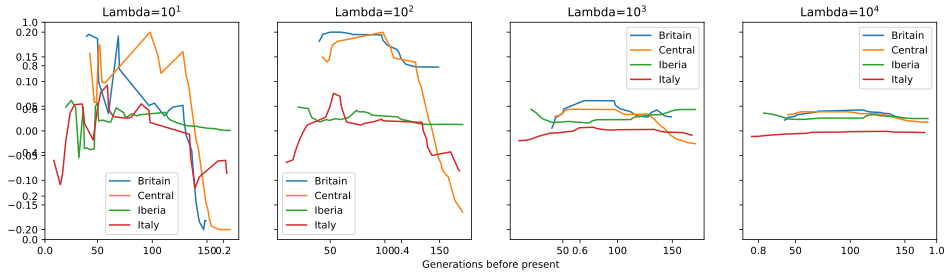

<IPython.core.display.Javascript object>

In [24]:
fig, axs = plt.subplots(ncols=4, figsize=(16, 4), sharey=True)

for j, (ax, log10_lam) in enumerate(zip(axs, range(1, 5))):
    for pop in obs:
        data = obs[pop]
        res = estimate.estimate(data, lam=10**log10_lam, M=100)
        ax.plot(res["t"][:-1], res["s"], label=pop)
    ax.legend()
    ax.title.set_text(f"Lambda=$10^{log10_lam}$")

fig.add_subplot(111, frameon=False)
plt.xlabel("Generations before present")